Project: ICRC Collaboration. CAS Applied Data Sciencem Module 1. University of Bern

# Collaborative work at ICRC
## Descriptive statistics on collaborative spaces

### 1. Descriptive Statistics
In the part below, we will describe the collaborative subset of data more in detail.
We focus on the collaborative subset because, as we want, we want to analyse how people work with the documents that can be edited

In [5]:
#first, we import the necessary modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
# we set pandas to show as short decimal numbers, as we dont want excessive long strings that bring no added value:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#We import the data
df = pd.read_csv ('CollabCleanSPdata.csv')
#we have a quick look at it
df

,Unnamed: 0,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,1,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,3,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,4,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,5,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,6,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
...,...,...,...,...,...,...,...,...,...
106681,209760,Worksheet,FAD,0.090,144,11.530,2020-01-07,2020-09-04,241 days
106682,209761,Worksheet,FAD,1.290,136,410.040,2019-12-19,2020-09-04,260 days
106683,209762,Worksheet,FAD,0.050,211,9.270,2020-05-25,2020-09-04,102 days
106684,209766,Worksheet,FAD,0.620,128,71.460,2020-02-05,2020-09-04,212 days


In [6]:
#we delete the "unnamed" column, that has given us the index of the source dataframe
del df['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [7]:
df.head(10)

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
5,Textual,ASSIST,0.230,1,0.900,2014-08-11,2014-08-20,9 days
6,Textual,ASSIST,0.090,1,0.270,2014-08-11,2014-08-20,9 days
7,Worksheet,ASSIST,1.450,1,4.350,2014-08-13,2014-08-20,7 days
8,Worksheet,ASSIST,1.450,1,2.900,2014-08-13,2014-08-20,7 days
9,Textual,ASSIST,0.160,1,0.160,2014-08-18,2014-08-20,2 days


In [ ]:
#we look also at the type of data we have, to see if we can work with it
df.info()

In [8]:
#Created and last modified are dates, not objects; working days should be a time delta, not an object. We correct this:
df['Created'] = pd.to_datetime(df['Created'])
df['Last_modified'] = pd.to_datetime(df['Last_modified'])
df['Working_days'] = pd.to_timedelta(df['Working_days'])
df.head(10)

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
5,Textual,ASSIST,0.230,1,0.900,2014-08-11,2014-08-20,9 days
6,Textual,ASSIST,0.090,1,0.270,2014-08-11,2014-08-20,9 days
7,Worksheet,ASSIST,1.450,1,4.350,2014-08-13,2014-08-20,7 days
8,Worksheet,ASSIST,1.450,1,2.900,2014-08-13,2014-08-20,7 days
9,Textual,ASSIST,0.160,1,0.160,2014-08-18,2014-08-20,2 days


In [9]:
#and we check that it worked.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106686 entries, 0 to 106685
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   File_type      106686 non-null  object         
 1   Service        106686 non-null  object         
 2   SizeMB         106686 non-null  float64        
 3   Version        106686 non-null  int64          
 4   Total_sizeMB   106686 non-null  float64        
 5   Created        106686 non-null  datetime64[ns] 
 6   Last_modified  106686 non-null  datetime64[ns] 
 7   Working_days   106686 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 6.5+ MB


In [10]:
#then, we extract some basic statistics
df.describe()

,SizeMB,Version,Total_sizeMB,Working_days
count,106686.000,106686.000,106686.000,106686
mean,1.370,2.716,4.750,82 days 09:33:27.423654461
std,7.386,8.548,44.035,170 days 06:26:18.189711008
min,0.000,1.000,0.000,0 days 00:00:00
25%,0.040,1.000,0.070,0 days 00:00:00
50%,0.070,1.000,0.160,0 days 00:00:00
75%,0.270,2.000,0.700,59 days 00:00:00
max,249.410,511.000,5485.640,1739 days 00:00:00


Here we see some interesting facts already:
- Standard deviation is quite high in many values
- Our Version distribution seems not to be normal. We saw that in the previous module
We do a quick check on the kurtosis and skewness of all values

In [11]:
df.kurt()

SizeMB          328.303
Version        1167.858
Total_sizeMB   4110.512
dtype: float64

In [12]:
df.skew()

SizeMB         14.868
Version        27.013
Total_sizeMB   49.952
dtype: float64

In [13]:
df.var()

SizeMB           54.560
Version          73.072
Total_sizeMB   1939.093
dtype: float64

Some other descriptive statistics:


In [16]:
#we calculate the correlation and covariance matrix, per file type
df[df['File_type']=='Textual'].cov()

,SizeMB,Version,Total_sizeMB
SizeMB,7.361,0.088,27.889
Version,0.088,27.353,12.856
Total_sizeMB,27.889,12.856,356.874


In [17]:
df[df['File_type']=='Textual'].corr()

,SizeMB,Version,Total_sizeMB
SizeMB,1.000,0.006,0.544
Version,0.006,1.000,0.130
Total_sizeMB,0.544,0.130,1.000


In [18]:
df[df['File_type']=='Presentation'].cov()

,SizeMB,Version,Total_sizeMB
SizeMB,248.722,-1.458,558.976
Version,-1.458,18.885,39.208
Total_sizeMB,558.976,39.208,3874.831


In [19]:
df[df['File_type']=='Presentation'].corr()

,SizeMB,Version,Total_sizeMB
SizeMB,1.000,-0.021,0.569
Version,-0.021,1.000,0.145
Total_sizeMB,0.569,0.145,1.000


In [20]:
df[df['File_type']=='Worksheet'].cov()

,SizeMB,Version,Total_sizeMB
SizeMB,55.752,-0.697,184.504
Version,-0.697,132.229,168.422
Total_sizeMB,184.504,168.422,3102.695


In [21]:
df[df['File_type']=='Worksheet'].corr()

,SizeMB,Version,Total_sizeMB
SizeMB,1.000,-0.008,0.444
Version,-0.008,1.000,0.263
Total_sizeMB,0.444,0.263,1.000


In [15]:
#And we get a table with the correlations among files
df.corr()

,SizeMB,Version,Total_sizeMB
SizeMB,1.000,-0.006,0.475
Version,-0.006,1.000,0.225
Total_sizeMB,0.475,0.225,1.000


In [24]:
#Finally, as it will be useful for later to concentrate the analysis in files with low value,
#we will create a dataframe with documents having a version below 15
df_lowV = df[(df.Version <= 15)].copy()

In [25]:
#And we check the result:
df_lowV

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
...,...,...,...,...,...,...,...,...
106675,Presentation,FAD,1.460,1,1.460,2020-09-04,2020-09-04,0 days
106676,Worksheet,FAD,0.070,2,0.220,2020-09-04,2020-09-04,0 days
106678,Worksheet,FAD,1.310,9,11.180,2020-08-14,2020-09-04,21 days
106680,Worksheet,FAD,0.050,1,0.050,2020-09-04,2020-09-04,0 days


### 2. Descriptive plotting:
Here we will run a series of graphics to have a first overview of our data. In particular:
- We will do a scatter plow of all document Versions together, in relation with the total size, for both the total dataframe and the one with low versions (Below 15)
- We will plot other graphs to have better visualisations of the insights of our data

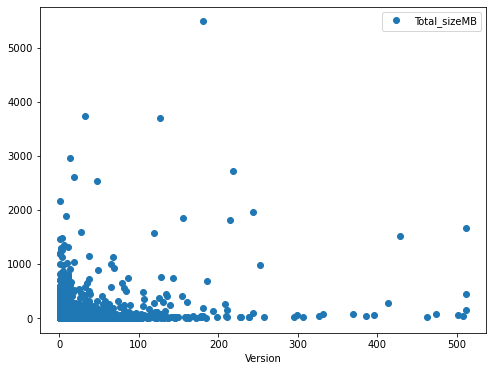

In [22]:
#scatter plow
ax =df.plot(x='Version', y='Total_sizeMB', marker="o" , linestyle='None', figsize=(8,6))
plt.legend()
plt.show()

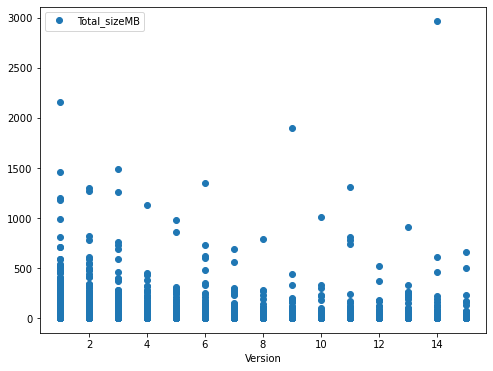

In [26]:
#We do the same with the low version dataframe
ax =df_lowV.plot(x='Version', y='Total_sizeMB', marker="o" , linestyle='None', figsize=(8,6))
plt.legend()
plt.show()

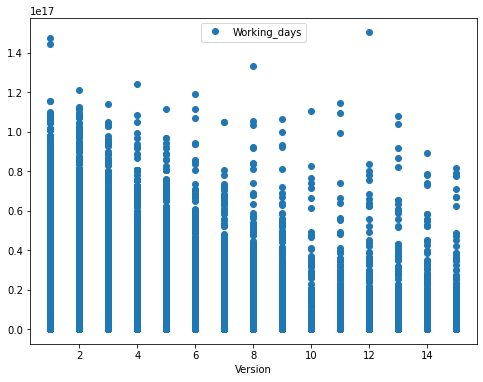

In [29]:
ax =df_lowV.plot(x='Version', y='Working_days',marker="o", linestyle='None',figsize=(8,6))
plt.legend()
plt.show()

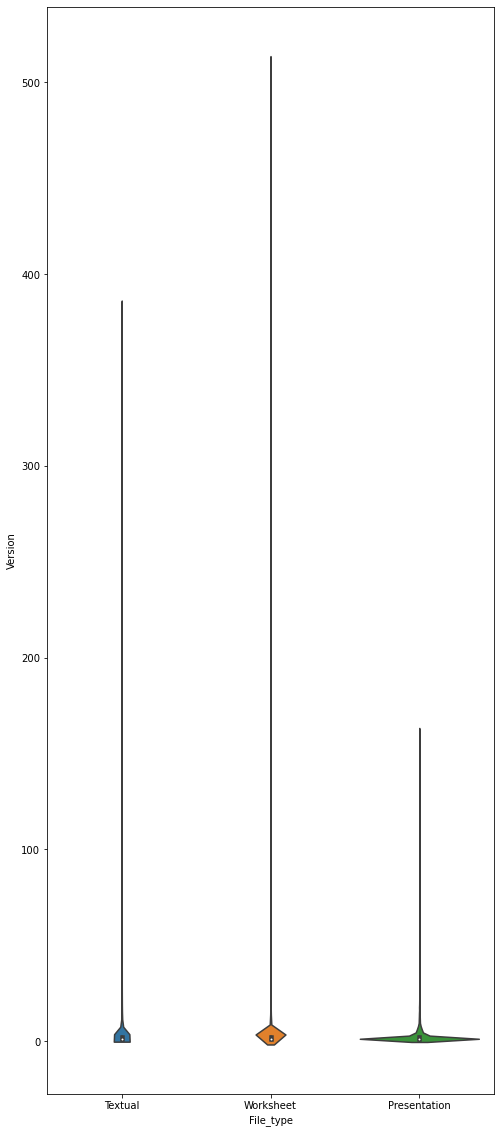

In [30]:
# we do the same in relation with the file type and the Version
plt.figure(figsize=(8,20))
sns.violinplot(data=df, y='Version', x='File_type');

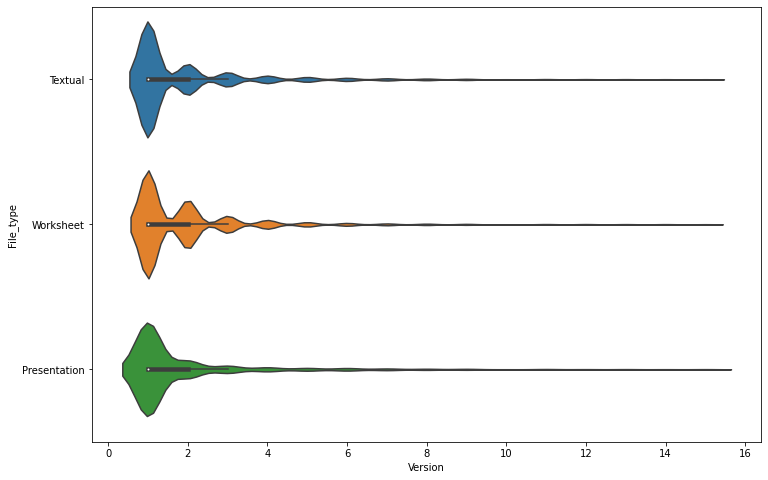

In [31]:
#and we plot the same violin but with low version files
plt.figure(figsize=(12,8))
sns.violinplot(data=df_lowV, y='File_type', x='Version');

<AxesSubplot:xlabel='Service', ylabel='Version'>

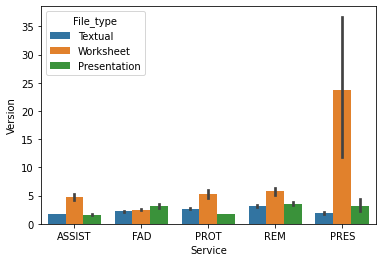

In [32]:
#a barplot having Version distribution, file types, by service
sns.barplot(data = df, x='Service', y='Version', hue='File_type')

<AxesSubplot:xlabel='Total_sizeMB', ylabel='Version'>

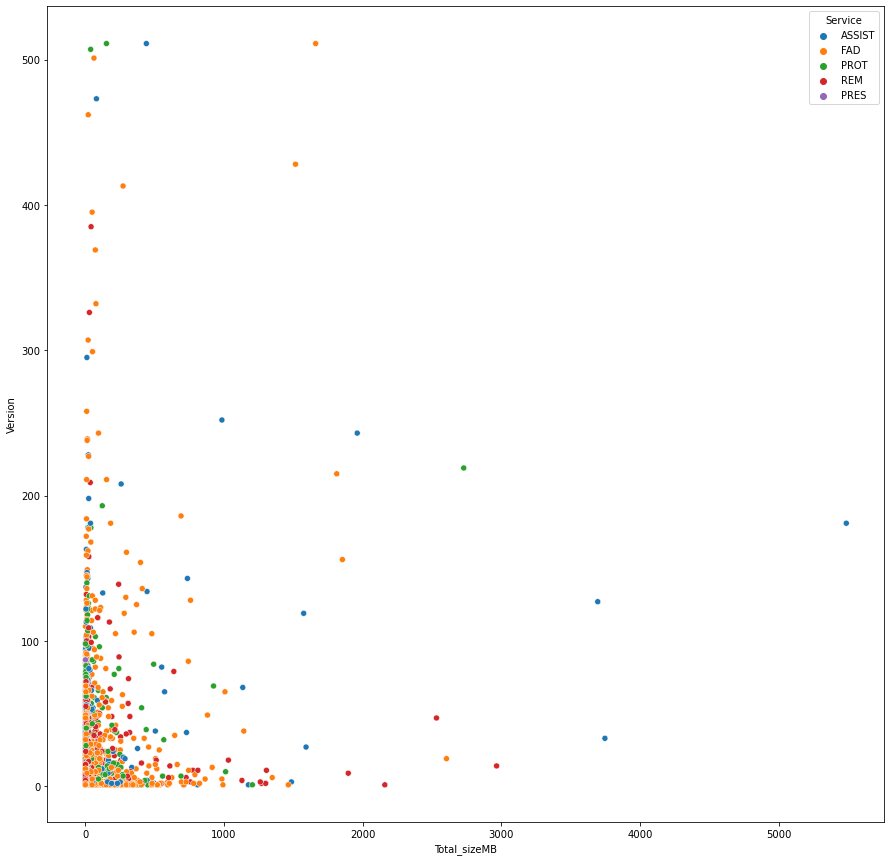

In [35]:
#we do a scatterflow with the size of files and its version, by service
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="Total_sizeMB", y="Version", hue="Service")

<AxesSubplot:xlabel='Total_sizeMB', ylabel='Version'>

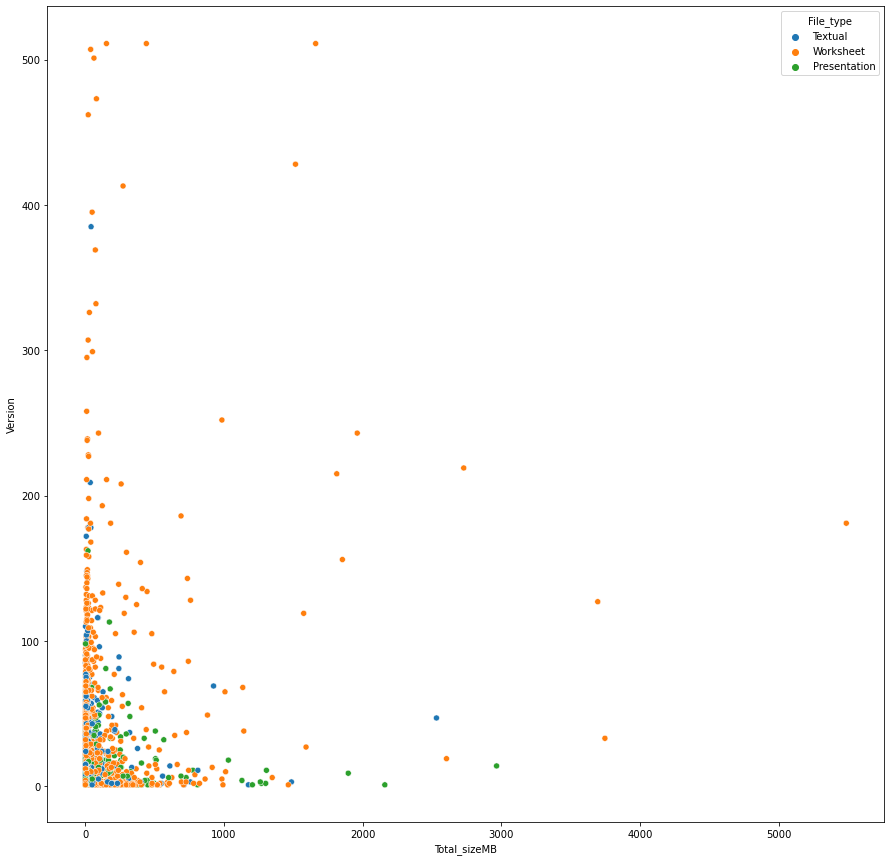

In [36]:
#and the same with file types
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="Total_sizeMB", y="Version", hue="File_type")

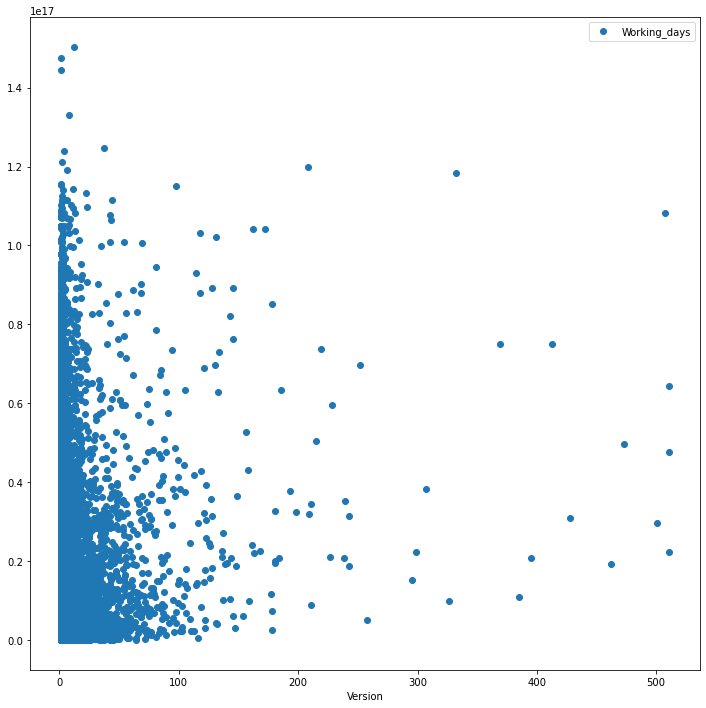

In [37]:
# We want to see if there is a relation in the working days and the number of versions
ax =df.plot(x='Version', y='Working_days', marker="o" , linestyle='None', figsize=(12,12))
plt.legend()
plt.show()

### 3. Answering our question:
We want to assess how people collaborate at ICRC, in general, and by type of service. As a reminder, we have the following services:
- FAD (Finance and Administration) responsible for finances
- REM (Ressources Mobilisation) responsible for fundraising
- PROT (Protection) responsible for humanitarian protection response
- ASSIST (Assistance) responsible for humanitarian assistance response
- PRES (Presidency) responsible for the leadership of the institution.
The first two services (FAD and REM) are administrative services. PROT and ASSIST are operational services where the last one is a political body.

For what we have seen in our graphics, our distribution of Version history seems to be not normal, probably a poisson distribution. We can check that this is the case and then use a p-value to assess the probability of reachen a given version number. The higher the probability, the higher the collaboration among colleagues.

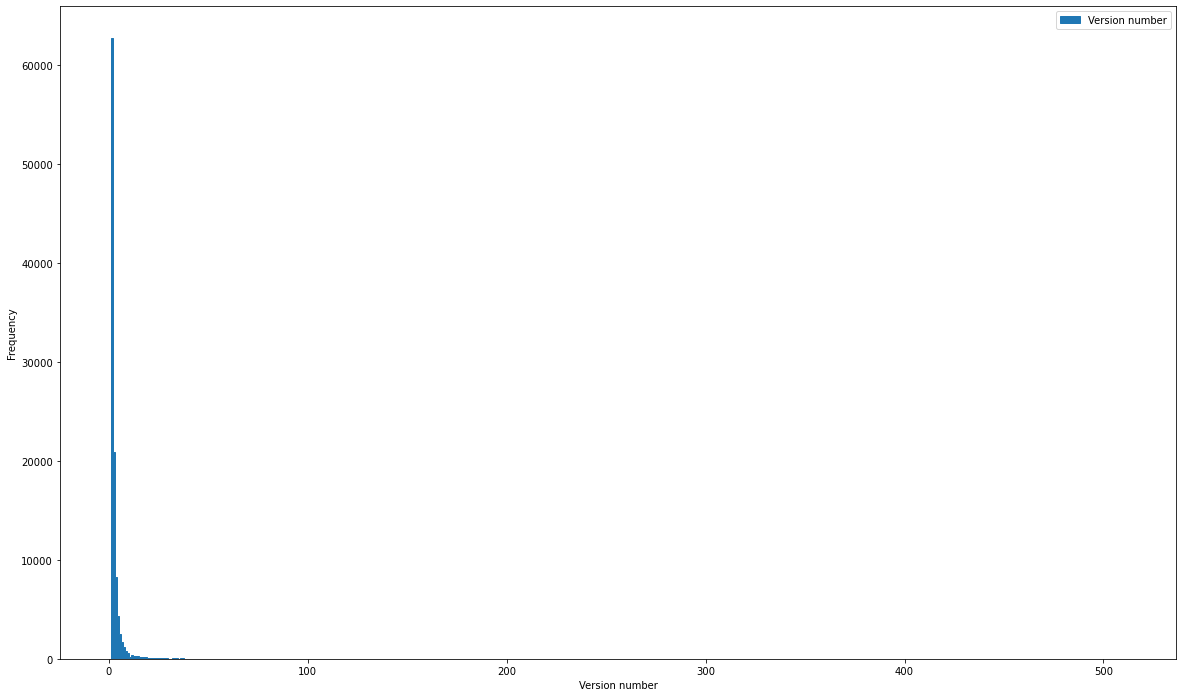

In [47]:
#When we plot our version histogram it looks it has a poisson distribution
#We saw above that the versions range from 1 to 511. Let's represent all of them:
ax = df['Version'].plot(bins=511,range=(1,511), kind="hist",fill=True,histtype='step',label='Version number', figsize=(20,12))
ax.set_xlabel('Version number')
plt.legend()
plt.show()

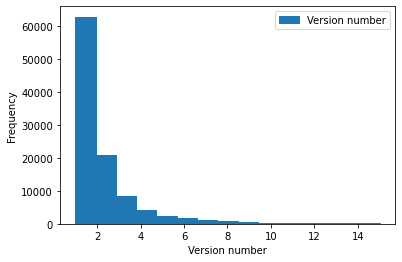

In [48]:
#As we saw before, most values are at the early versions. 
#Let's focus at those first values and represent only the 15 most common occurences:
ax = df['Version'].plot(bins=15,range=(1,15), kind="hist",fill=True,histtype='step',label='Version number')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

In [50]:
#I get the basic statistical information from my Low Version dataframe:
df_lowV.describe()

,SizeMB,Version,Total_sizeMB,Working_days
count,104694.000,104694.000,104694.000,104694
mean,1.377,1.997,3.983,80 days 13:19:15.160754199
std,7.439,1.952,29.133,168 days 07:54:27.678304978
min,0.000,1.000,0.000,0 days 00:00:00
25%,0.040,1.000,0.060,0 days 00:00:00
50%,0.070,1.000,0.160,0 days 00:00:00
75%,0.270,2.000,0.630,56 days 00:00:00
max,249.410,15.000,2964.450,1739 days 00:00:00


In [51]:
#We have to check it has a Poisson distribution. In a Poisson, Variance and Mean are equal
#Let's check that Variance = 1.997 (our mean) to see if we are in such a case:
df_lowV.var()

SizeMB          55.336
Version          3.809
Total_sizeMB   848.738
dtype: float64

### Probability
We have discovered that our dataframe is not poisson distributed. We cannot use the poisson.pmf formula existing in scipy to calculate our probability
Let's get the probability of getting at least a version 3. This number will be obtain by suming the probabilities of all versions above and including 3

In [52]:
#I calculate the probability of getting a version in my dataframe
df['Pro'] = df.Version.map(df.Version.value_counts(normalize=True)).copy()

In [53]:
#I get rid of the duplicates to get the probability of each version
df_Pro=df[['Version', 'Pro']].drop_duplicates(subset=['Version']).copy()
df_Pro

,Version,Pro
0,1,0.589
12,2,0.196
91,4,0.041
96,6,0.016
97,3,0.078
...,...,...
106661,238,0.000
106672,159,0.000
106677,156,0.000
106679,136,0.000


In [54]:
#I sort the values to have the versions in order
df_Pro.sort_values(by=['Version'], inplace=True)
df_Pro

,Version,Pro
0,1,0.589
12,2,0.196
97,3,0.078
91,4,0.041
185,5,0.024
...,...,...
21703,462,0.000
106345,473,0.000
76932,501,0.000
92328,507,0.000


<AxesSubplot:xlabel='Version'>

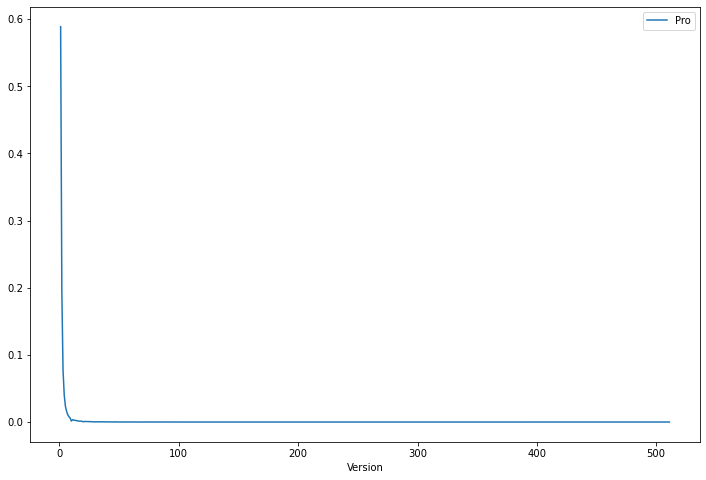

In [55]:
#...and I represent it graphically
df_Pro.plot(x='Version', y='Pro', figsize=(12,8))

<AxesSubplot:xlabel='Version'>

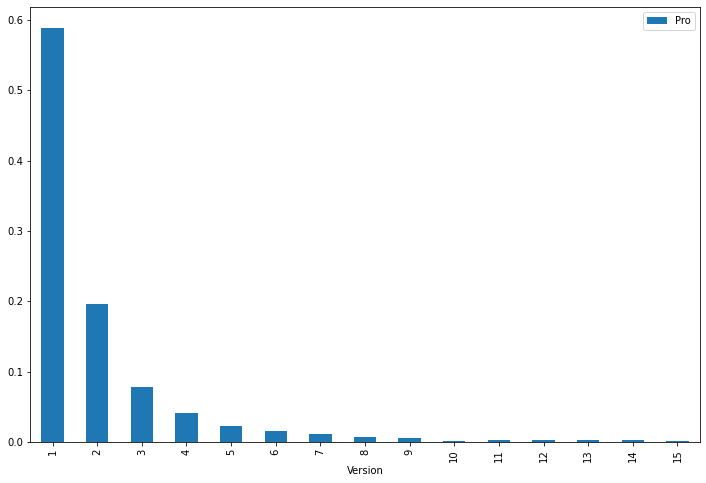

In [56]:
#I do the same graphic, but only with the first 15 Versions
df_lowP = df_Pro[(df_Pro.Version <= 15)].copy()
#df_lowP
df_lowP.plot(x='Version', y='Pro', kind='bar',figsize=(12,8))

## From here onwards:
- I will do boxplots of the versions by service, to see if they can compare 
- I will create dataframes by kind of services (Administrative, Operational and Political) to work on them
- I will plot histograms of Version by these three kinds, normalised in order to make them comparable
- Finally, I will run a mann-withney test by the three kinds of service to see if we can deduce they work differently (i.e., they come from different samples) or not.

<AxesSubplot:xlabel='Version', ylabel='Service'>

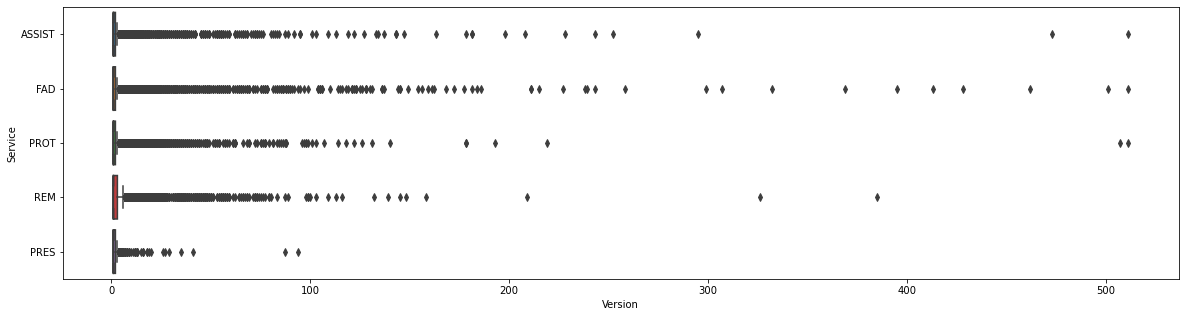

In [57]:
# Boxplots I'll do a general boxplot, and by kind of service
#import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(data=df, y='Service', x='Version', notch=True)

<AxesSubplot:xlabel='Version', ylabel='Service'>

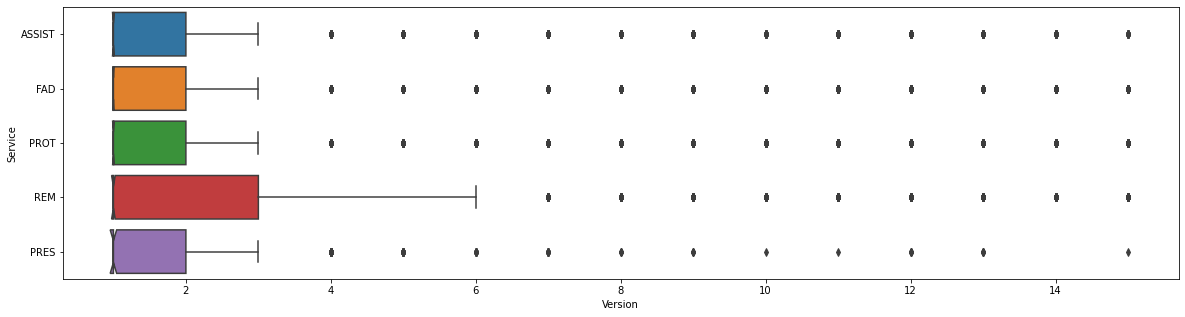

In [58]:
# Boxplots I'll do a general boxplot, and by kind of service
plt.figure(figsize=(20,5))
sns.boxplot(data=df_lowV, y='Service', x='Version', notch=True)

Some conclusions here:
- Version is very low in all cases. Above version 4 are outliers for every service. The exception is REM

In [59]:
#I will split the dataset (global and low version) in administrative & operational services
df_ad = df[(df['Service'] == 'FAD') | (df['Service'] == 'REM')].copy()
df_op = df[(df['Service'] == 'PROT') | (df['Service'] == 'ASSIST')].copy()
df_po = df[df['Service']=='PRES'].copy()

In [60]:
#I check that it worked
df_ad

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days,Pro
134,Presentation,FAD,1.190,1,1.190,2015-11-11,2015-11-11,0 days,0.589
135,Worksheet,FAD,0.050,1,0.050,2015-11-11,2015-11-11,0 days,0.589
136,Textual,FAD,0.040,1,0.040,2015-11-11,2015-11-11,0 days,0.589
137,Textual,FAD,0.040,8,0.260,2015-11-24,2015-11-26,2 days,0.008
148,Textual,FAD,0.140,2,0.300,2015-11-11,2015-12-11,30 days,0.196
...,...,...,...,...,...,...,...,...,...
106681,Worksheet,FAD,0.090,144,11.530,2020-01-07,2020-09-04,241 days,0.000
106682,Worksheet,FAD,1.290,136,410.040,2019-12-19,2020-09-04,260 days,0.000
106683,Worksheet,FAD,0.050,211,9.270,2020-05-25,2020-09-04,102 days,0.000
106684,Worksheet,FAD,0.620,128,71.460,2020-02-05,2020-09-04,212 days,0.000


In [61]:
#I will do the same with our "low version" dataset
df_ad_LowV = df_lowV[(df_lowV['Service'] == 'FAD') | (df_lowV['Service'] == 'REM')].copy()
df_op_LowV = df_lowV[(df_lowV['Service'] == 'PROT') | (df_lowV['Service'] == 'ASSIST')].copy()
df_po_LowV = df_lowV[df_lowV['Service']=='PRES'].copy()

In [62]:
#I will do the same with our "low version" dataset, for the file type
df_doc_LowV = df_lowV[df_lowV['File_type']=='Textual'].copy()
df_ppt_LowV = df_lowV[df_lowV['File_type']=='Presentation'].copy()
df_xls_LowV = df_lowV[df_lowV['File_type']=='Worksheet'].copy()

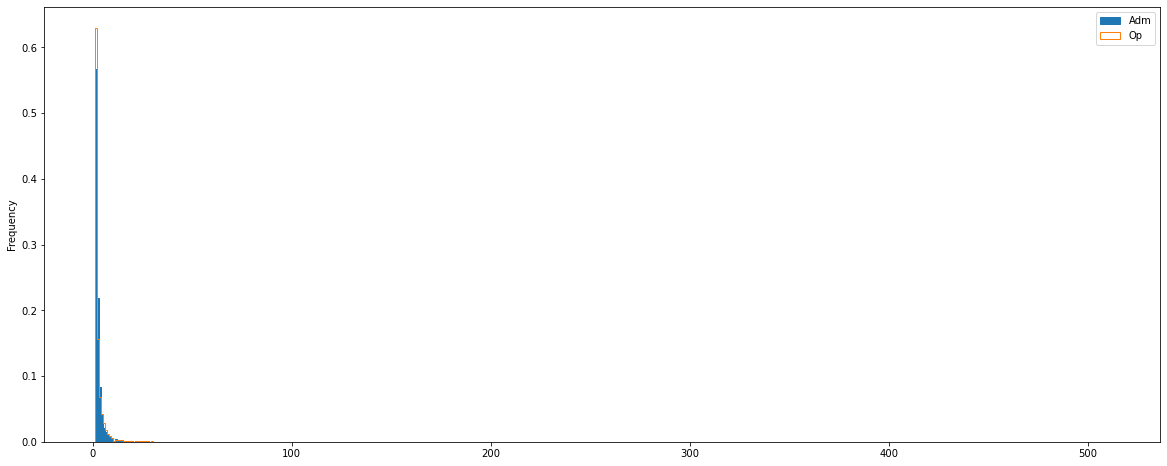

In [63]:
#I will represent the distribution of Versions for both dataframes
#since the number of documents (observations) is different, I will normalise the graph to be able to compare
df_ad['Version'].plot(bins=511,range=(1,511),kind="hist",fill=True,histtype='step',label='Adm', density=True, figsize=(20,8))
df_op['Version'].plot(bins=511,range=(1,511),kind="hist",fill=False,histtype='step',label='Op', density=True, figsize=(20,8))
plt.legend()
plt.show()

No surprise that this is almost impossible to read. But we gess some differences... Let's focus again in the lower versions

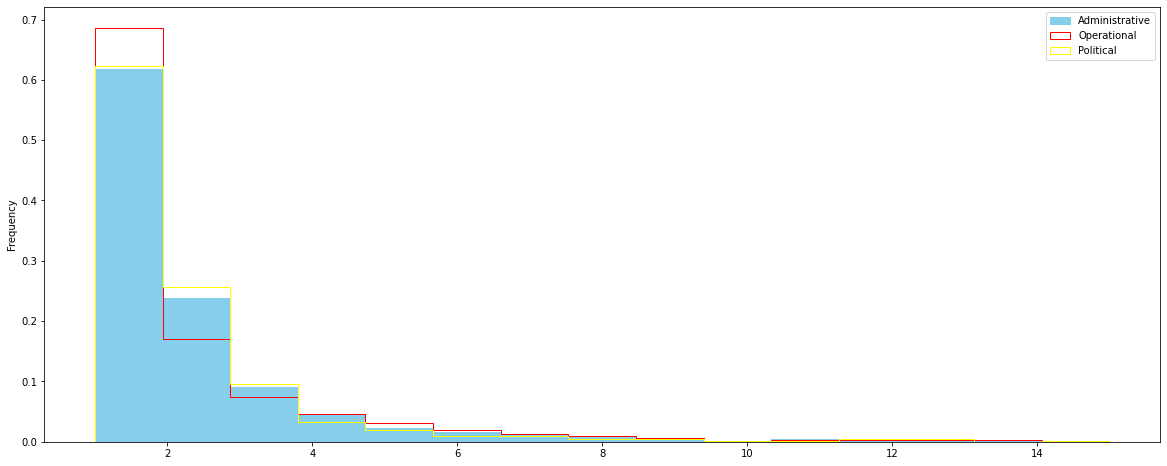

In [64]:
df_ad_LowV['Version'].plot(bins=15, kind="hist",fill=True,color='skyblue',histtype='step',label='Administrative', density=True, figsize=(20,8))
df_op_LowV['Version'].plot(bins=15, kind="hist",fill=False,color='red',histtype='step',label='Operational', density=True, figsize=(20,8))
df_po_LowV['Version'].plot(bins=15, kind="hist",fill=False,color='yellow',histtype='step',label='Political', density=True, figsize=(20,8))
plt.legend()
plt.show()

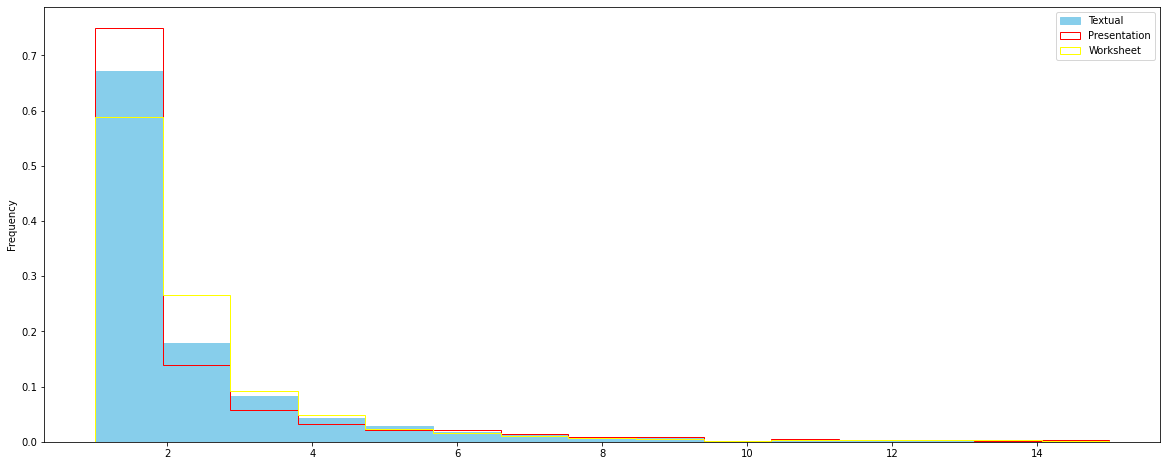

In [65]:
df_doc_LowV['Version'].plot(bins=15, kind="hist",fill=True,color='skyblue',histtype='step',label='Textual', density=True, figsize=(20,8))
df_ppt_LowV['Version'].plot(bins=15, kind="hist",fill=False,color='red',histtype='step',label='Presentation', density=True, figsize=(20,8))
df_xls_LowV['Version'].plot(bins=15, kind="hist",fill=False,color='yellow',histtype='step',label='Worksheet', density=True, figsize=(20,8))
plt.legend()
plt.show()

Here we see that there might be a difference in the way of working between the three services.
Out of the graph, we can see that Administrative and Political documents are closer to each other than Administrative and Operational.
If we want to resolve this question (Do service work differently?), we could assume that we have two samples (one is "Administrative" and the other is "Operational") and those samples are not paired (it is not the same person creating two documents). In this case, the best test to use is the Mann-Whithney test. We will do it with Administrative and Operational data, and finally with Administrative and Political
Our null hypothesis H0 is that the distribution of both populations are equal.
Our alternative hypothesis H1 is that the distribution of both populations is not equal, thus, there is a difference among them that allows us to conclude that both populations work differently in Sharepoint

In [66]:
#We run the test in the whole population and in the lower version population
from scipy import stats
stats.mannwhitneyu(df_ad['Version'],df_op['Version'])

MannwhitneyuResult(statistic=1229811282.0, pvalue=9.849611125021713e-45)

In [67]:
stats.mannwhitneyu(df_ad_LowV['Version'],df_op_LowV['Version'])

MannwhitneyuResult(statistic=1181174376.0, pvalue=7.460119065756636e-49)

The P value is well below 5% between Operations and Administration in both cases. We can assume that they come from different samples and thus, that they work differently. Let's check the political bodies vs the other two:

In [68]:
#First with the whole population
#Political vs Administrative
stats.mannwhitneyu(df_po['Version'],df_ad['Version'])

MannwhitneyuResult(statistic=41017173.0, pvalue=0.05460307030360114)

In [69]:
#Political Vs Operational
stats.mannwhitneyu(df_po['Version'],df_op['Version'])

MannwhitneyuResult(statistic=23612134.5, pvalue=0.04535339094652567)

In [70]:
#Then with the lower version sample
#Political vs Administrative
stats.mannwhitneyu(df_po_LowV['Version'],df_ad_LowV['Version'])

MannwhitneyuResult(statistic=40090773.0, pvalue=0.12925266153495296)

In [71]:
#Political vs Operational
stats.mannwhitneyu(df_po_LowV['Version'],df_op_LowV['Version'])

MannwhitneyuResult(statistic=22694611.0, pvalue=0.010051810425034653)

In [72]:
stats.mannwhitneyu(df_doc_LowV['Version'],df_xls_LowV['Version'])

MannwhitneyuResult(statistic=1041806776.0, pvalue=1.1415248285123397e-68)

In [73]:
stats.mannwhitneyu(df_doc_LowV['Version'],df_ppt_LowV['Version'])

MannwhitneyuResult(statistic=236519746.0, pvalue=9.347830903680159e-38)

In [74]:
stats.mannwhitneyu(df_xls_LowV['Version'],df_ppt_LowV['Version'])

MannwhitneyuResult(statistic=213225700.5, pvalue=2.660634435508406e-121)

We can accept our hypothesis. 